# KNN (K-최근접 이웃, K-Nearest Neighbor)

- 데이터 분류에 사용되는 아주 간단한 지도학습
- 현재 데이터를 특성값으로 분류하기 위해 기존의 데이터 안에서 현재 데이터로부터 가까운 k개의 데이터를 찾아 k개의 레이블 중 가장 많이 분류된 값으로 현재의 데이터를 분류하는 알고리즘
- k는 홀수로 지정하는 것이 좋다 -> 왜냐? 짝수로 하면 과반수 이상의 이웃이 안나올 수도 있기 때문에
- 최적의 k ? 검증 데이터를 통해 가장 정확도가 높은 k를 KNN 알고리즘의 k로 선정함.

- KNN은 다중 분류에서도 탁월 한 성능을 보임
- 간단한 수식으로는 두 점 사이의 거리 공식을 사용(vector space 내에서)

### 장점
- 다른 알고리즘 보다 이해하기 쉽다.
    - 수학적 지식이 다른 알고리즘에 비해 거리 계산하는 방법만 알면 이해하기 편하다
- 숫자로 구분된 속성에 우수한 성능을 보임
- 별도의 모델 학습이 필요 없다. 예측을 하는 시점에서 바로 계산하기 때문에 사전 모델 학습이 필요 없음.
    - 이러한 특성을 게으른 학습(lazy learning)이라고 함. 데이터베이스의 실시간 데이터를 사용해야 할 때 유용함

### 단점
- 예측 속도가 느림. (매번 예측할 때마다 연산을 하기 때문에)
- 다른 머신러닝 알고리즘에 비해 예측값이 지역 정보에 많이 편향될 수 있음.

## 농구선수 포지션 예측 문제

In [1]:
import numpy as np
import pandas as pd

In [2]:
#예제 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv')

In [4]:
df.tail()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1
99,Lou Williams,SG,2.0,3.3,2.5,3.0,1.0,0.2


#### 농구선수 데이터의 약어 설명
- Player : 선수 이름
- Pos : 포지션 
- 3P : 한 경기 평균 3점슛 성공 횟수
- 2P : 한 경기 평균 2점슛 성공 횟수
- TRB : 한 경기 평균 리바운드 성공 횟수
- AST : 한 경기 평균 어시스트 성공 횟수
- STL : 한 경기 평균 스틸 성공 횟수
- BLK : 한 경기 평균 블로킹 성공 횟수
- C : 센터
- SG : 슈팅가드


In [5]:
# 현재 데이터에서 포지션의 개수를 확인
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

#### 가설을 통해 필요한 데이터와 불필요한 데이터를 구분
- 필요 데이터 : 3P(슈팅가드의 구분), TRB(센터의 구분), BLK(센터의 구분)
- 불필요 데이터 : 나머지
- 가설 검증, 입증에 좋은 방법은 바로 **시각화**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'STL and 2P in 2d plane')

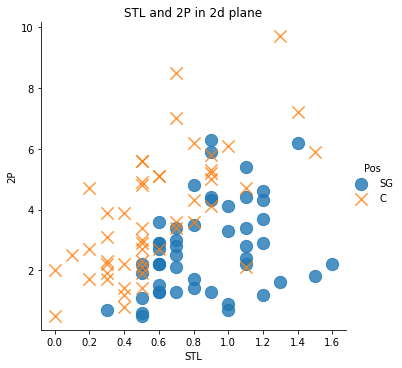

In [7]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인(회귀선 안그린다)
           scatter_kws={'s':150}, # 좌표 상의 점의 크기
           markers=['o', 'x'],
           hue='Pos') # 예측값
# 타이틀
plt.title('STL and 2P in 2d plane')

Text(0.5, 1.0, 'AST and 2P in 2d plane')

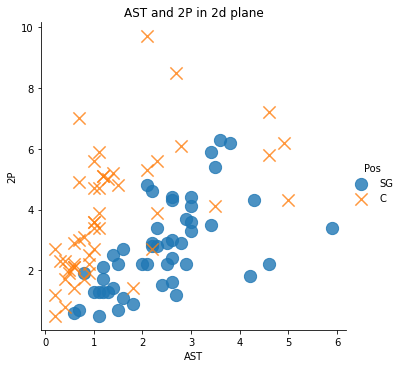

In [8]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인(회귀선 안그린다)
           scatter_kws={'s':150}, # 좌표 상의 점의 크기
           markers=['o', 'x'],
           hue='Pos') # 예측값
# 타이틀
plt.title('AST and 2P in 2d plane')

- STL&2P , AST&2P는 구분이 불명확해 보임

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

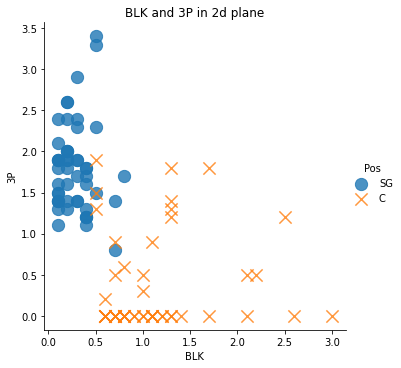

In [9]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인(회귀선 안그린다)
           scatter_kws={'s':150}, # 좌표 상의 점의 크기
           markers=['o', 'x'],
           hue='Pos') # 예측값
# 타이틀
plt.title('BLK and 3P in 2d plane')

Text(0.5, 1.0, 'TRB and 3P in 2d plane')

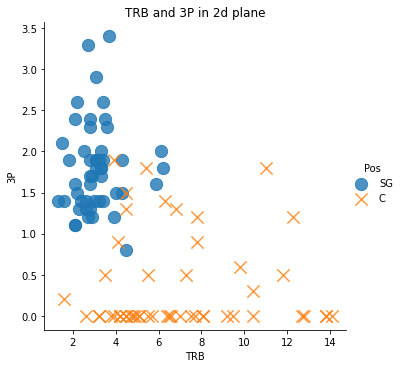

In [10]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인(회귀선 안그린다)
           scatter_kws={'s':150}, # 좌표 상의 점의 크기
           markers=['o', 'x'],
           hue='Pos') # 예측값
# 타이틀
plt.title('TRB and 3P in 2d plane')

- BLK&3P, TRB&3P : 구분이 어느정도 있어보임!

### 데이터 다듬기
- 불필요한 데이터를 삭제하고 정리해주자

In [11]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True) # 2P, AST, STL 삭제하고 원래 데이터에 반영

In [12]:
df.tail()

,Player,Pos,3P,TRB,BLK
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1
99,Lou Williams,SG,2.0,2.5,0.2


### 데이터 나누기
- 데이터를 학습, 테스트 데이터로 나누기
- 사이킷런을 이용해서 나눠보자

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train, test = train_test_split(df, test_size=0.2) # 테스트 데이터 셋을 20%으로 만들자

In [27]:
print(train.shape[0])
print(test.shape[0])

80
20


### 최적의 KNN 파라미터 찾기 (k값 찾기)
- KNN의 조절 가능 변수는 오직 k
- 어떻게 k값을 찾을까?
    - 검증 데이터를 사용해 가장 예측율이 높은 k를 찾는것

- 사이킷런의 cross_val_score를 이용해 찾아보자
    - 교차 검증(cross validation)을 수행하자
    - k-fold 교차 검증 : 기존 데이터를 k개로 나눠서 k번 정확도를 검증하는 방법
    
- 학습 데이터를 10조각으로 나눠 1조각을 검증 데이터로 사용하고 나머지 9조각을 학습 데이터로 사용함
- 1~10번째 조각들로 이와같은 과정을 각각 진행해서 10개의 검증 결과를 10으로 나눈 평균을 검증 결과 점수로 간주함
- 이때 똑같은 검증 과정을, k=3부터 학습 데이터 절반의 크기까지 수행해서 cross_validation_scores에 각 k의 검증 결과 점수를 저장함

In [28]:
# knn 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [29]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정

In [30]:
max_k_range = train.shape[0] // 2 # train set 크기를 2로 나눠 정수로 만듦
k_list = [] # 빈 리스트 생성
for i in range(3, max_k_range, 2) : # 3부터 max_k_range까지 2씩 키워 증가(홀수로 지정)
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [31]:
# 교차 검증 (10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.9125,
 0.9125,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9,
 0.875,
 0.8625,
 0.85,
 0.8625,
 0.8375]

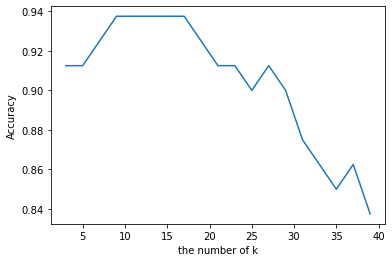

In [32]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [33]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k : {}'.format(k))

The best number of k : 9


### 모델 테스트
- 3점슛, 블로킹, 리바운드 3개의 속성으로 테스트 해보자

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

In [37]:
# 학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

In [38]:
# KNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [39]:
# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]
# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

In [40]:
# 테스트 시작
pred = knn.predict(x_test)

In [41]:
# 모델 예측 정확도(accuracy) 출력
print('accuracy : {}'.format(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.8


In [42]:
# 실제값과 예측된 값을 시각화 해서 봐보자
comparison = pd.DataFrame({'prediction' : pred, 'ground_truth' : y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,SG
3,C,C
4,C,SG
5,SG,C
6,C,C
7,C,SG
8,C,C
9,C,C
